### Word2vec

단어의 의미를 무시하고 각각을 개별적인 기호로 취급 
- ONE HOT ENCODING : 총 단어수만큼의 길이의 벡터에서 단어 번호에 해당하는 원소만 1로 표시 

## 단어 임베딩 (Word  Embedding)
- 단어의  의미를 고려하여 좀 더 조밀한 차원에 단어를 벡터로 표현
- 벡텅의 차원을 단어 집합의 크기로 정하지 않고, 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤.
- 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨.
- 벡터 공간에서의 연산 가능 
- 단어의 의미를 고려하기 때문에 학습 성능이 높아짐.
EX) LSA, WordWvvec,FastText,Glove 등이 있음.

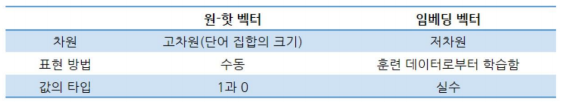

##  분산 표현 (Distributed Representation)
- 문맥의 다른단어들과의 관계를  고려해 단어의 의미를  포착 
- 분산 표현의  목적은 각 단어를 연관된 벡터로  변환해 관계식이 성립하는 일반적인 변환 함수를 탐색하는 것
- 단어를 표현한 벡터 사이의 유사한 정도로 단어  의미의유사한 정도를 표현 

-  대표적인 분산 표현 방법 
    -Word2vec
    
    
### Word2vec : 비지도 학습으로 임베딩 공간의 밀도를 높이는 방법
#### - CBOW (Continuous Bag Of Words)
주변에 있는 단어들을 가지고 , 중간에 있는 단어들을 예측하는 방법,
문맥 단어의 순서는 예측에 영향을 주지 않음

- 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우 라고 함.
- 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우라고 함.
#### - skip-gram
중간에 있는 단어로 주변 단어를 예측 

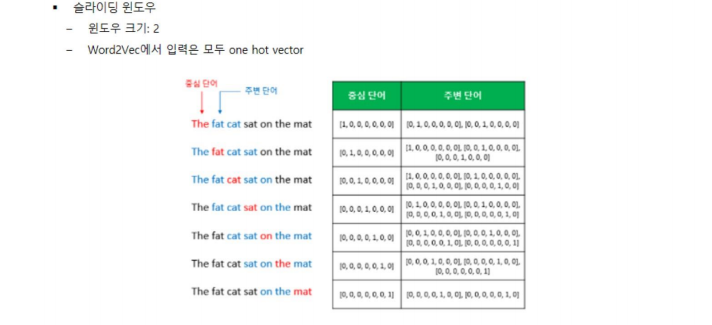

#### - CBoW





-"http://www.gutenberg.org/files/2591/2591-0.txt "

In [40]:
import requests
import re

In [ ]:
req = requests.get("http://www.gutenberg.org/files/2591/2591-0.txt")

In [ ]:
grimm = req.text[2993:540077]
grimm

In [ ]:
grimm = re.sub(r'[^\w\.]'," ",grimm) #불필용한 것 제거
grimm = re.sub(r'[^a-zA-z\.]'," ",grimm)
grimm

In [ ]:
from nltk.tokenize import sent_tokenize

sentence = sent_tokenize(grimm)
print(sentence[0]) #첫 문장만 확인하기 

In [ ]:
#단어토큰화
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

data_cin = []
stop_words =  set(stopwords.words('english')) #불용어

for i in sentence :
    sentence = word_tokenize(i) #단어토큰화
    result = []
    
    for word in sentence : 
        word = word.lower()
        if word not in stop_words:
            if len(word)>2:
                result.append(word)
                
    data_cin.append(result)
    
print(data_cin[0])

In [ ]:
pip install gensim

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(data_cin,sg=1,vector_size=100,window=3,min_count=3,workers=-1)
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")

In [ ]:
model.wv["apple"]
print(model.wv.similarity("apple","bird"))


In [ ]:
print(model.wv.similarity("princess","king"))

In [ ]:
model.wv.similarity("apple","forest")

#1에 가까울 수록 유사함.


In [ ]:
#apple과 가장 유사한 단어 찾아보기 
model.wv.most_similar("apple")

In [ ]:
model.wv.most_similar(positive  = ["queen","princess"],negative=["king"])